<a href="https://colab.research.google.com/github/Nadiana-Kelly/Aprendizagem_Automatica/blob/main/Lista06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import mahalanobis
import os

### Questão 1

Considere o conjunto de dados disponível em quake.csv, organizado em 2 colunas de atributos. Os dados referem-se a latitudes e longitudes de locais em
que foram registrados terremotos. Maiores detalhes sobre os dados podem ser
conferidos em https://www.openml.org/d/772.

a) Avalie o algoritmo K-médias com distância Euclidiana na tarefa de agrupamento para tais dados. O número de grupos deve ser escolhido entre os
valores 4, 5, 6, . . . , 19, 20 a partir do índice DB (Davies-Bouldin). Plote o
melhor resultado de agrupamento obtido.
Observação: Em cada avaliação repita múltiplas vezes (por exemplo, 20)
a execução do algoritmo K-médias, escolhendo a solução com melhor erro
de reconstrução.

b) Repita o item anterior considerando a distância de Mahalanobis.
Observação: Note que o índice DB deve ser alterado para usar a distância
de Mahalanobis neste item.

Questão 1a: K-médias com Distância Euclidiana
  Avaliando k = 4 (Euclidiana)...
  Avaliando k = 5 (Euclidiana)...
  Avaliando k = 6 (Euclidiana)...
  Avaliando k = 7 (Euclidiana)...
  Avaliando k = 8 (Euclidiana)...
  Avaliando k = 9 (Euclidiana)...
  Avaliando k = 10 (Euclidiana)...
  Avaliando k = 11 (Euclidiana)...
  Avaliando k = 12 (Euclidiana)...
  Avaliando k = 13 (Euclidiana)...
  Avaliando k = 14 (Euclidiana)...
  Avaliando k = 15 (Euclidiana)...
  Avaliando k = 16 (Euclidiana)...
  Avaliando k = 17 (Euclidiana)...
  Avaliando k = 18 (Euclidiana)...
  Avaliando k = 19 (Euclidiana)...
  Avaliando k = 20 (Euclidiana)...

K ótimo (Euclidiana): 6 com DB Index: 0.5564


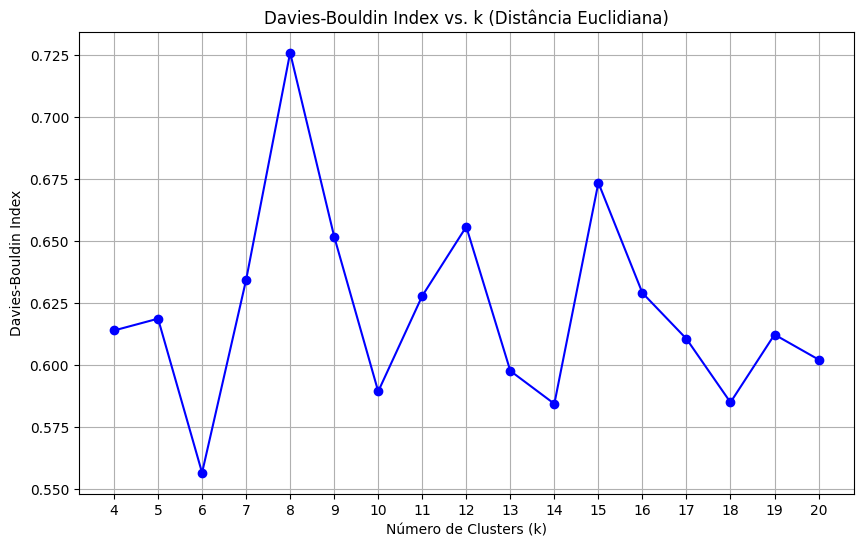

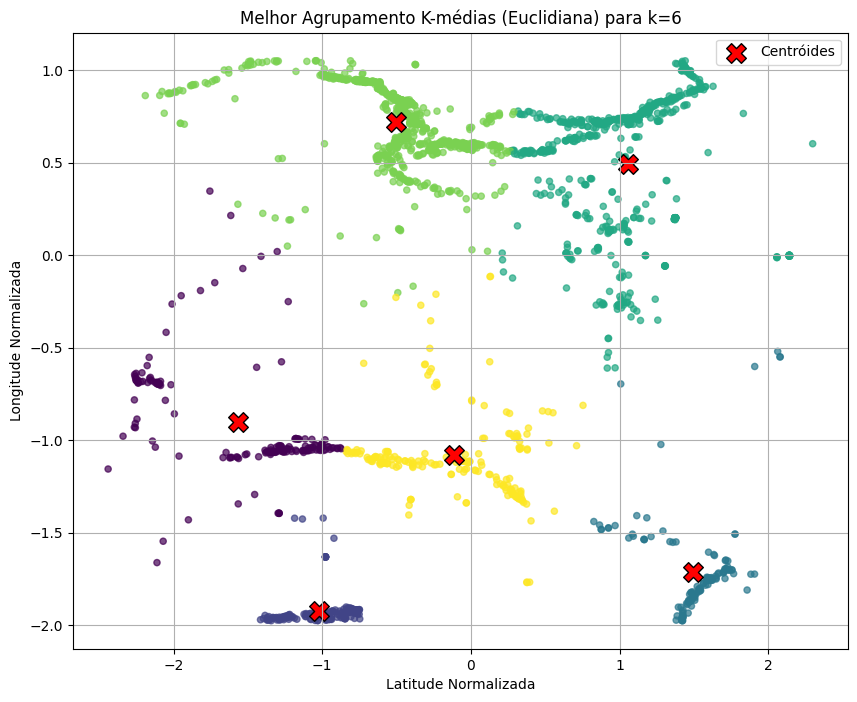


Questão 1b: K-médias com Distância de Mahalanobis
  Avaliando k = 4 (Mahalanobis)...
  Avaliando k = 5 (Mahalanobis)...
  Avaliando k = 6 (Mahalanobis)...
  Avaliando k = 7 (Mahalanobis)...
  Avaliando k = 8 (Mahalanobis)...
  Avaliando k = 9 (Mahalanobis)...
  Avaliando k = 10 (Mahalanobis)...
  Avaliando k = 11 (Mahalanobis)...
  Avaliando k = 12 (Mahalanobis)...
  Avaliando k = 13 (Mahalanobis)...
  Avaliando k = 14 (Mahalanobis)...
  Avaliando k = 15 (Mahalanobis)...
  Avaliando k = 16 (Mahalanobis)...
  Avaliando k = 17 (Mahalanobis)...
  Avaliando k = 18 (Mahalanobis)...
  Avaliando k = 19 (Mahalanobis)...
  Avaliando k = 20 (Mahalanobis)...

K ótimo (Mahalanobis): 16 com DB Index: 0.5724


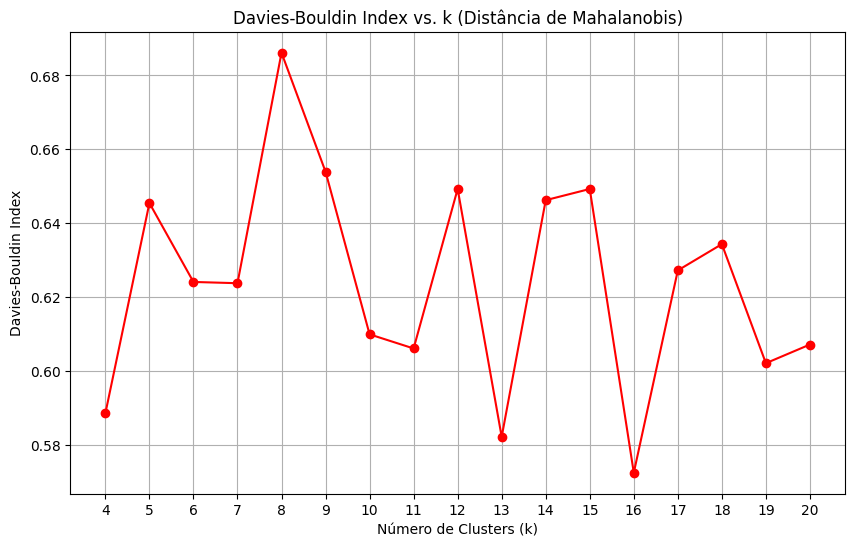

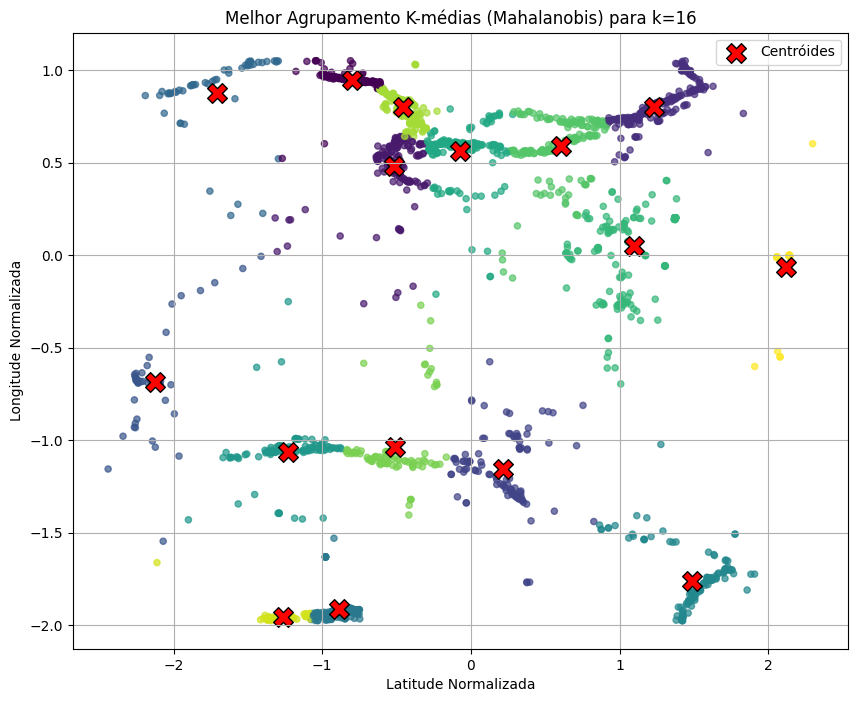

In [ ]:
def load_data(filepath):
    if not os.path.exists(filepath):
        print(f"Erro: Arquivo '{filepath}' não encontrado")
        exit()
    return pd.read_csv(filepath).values

def normalize_data(data_array):
    mean = np.mean(data_array, axis=0)
    std = np.std(data_array, axis=0)
    std[std == 0] = 1.0
    normalized_data = (data_array - mean) / std
    return normalized_data, mean, std

def euclidean_distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2)**2))

def custom_mahalanobis_distance(p1, p2, cov_matrix_inv):
    delta = p1 - p2
    return np.sqrt(delta.T @ cov_matrix_inv @ delta)

class KMeans:
    def __init__(self, k, max_iterations=300):
        self.k = k
        self.max_iterations = max_iterations
        self.centroids = None
        self.labels = None
        self.inertia = float('inf')

    def _initialize_centroids(self, X):
        indices = np.random.choice(X.shape[0], self.k, replace=False)
        self.centroids = X[indices]

    def _assign_clusters(self, X, distance_metric, cov_matrix_inv=None):
        labels = np.zeros(X.shape[0], dtype=int)
        for i, point in enumerate(X):
            min_dist = float('inf')
            closest_centroid_idx = -1
            for j, centroid in enumerate(self.centroids):
                if distance_metric == 'euclidean':
                    dist = euclidean_distance(point, centroid)
                elif distance_metric == 'mahalanobis':
                    if cov_matrix_inv is None:
                        raise ValueError("cov_matrix_inv must be provided for Mahalanobis distance.")
                    dist = custom_mahalanobis_distance(point, centroid, cov_matrix_inv)
                else:
                    raise ValueError("Distância métrica inválida.")

                if dist < min_dist:
                    min_dist = dist
                    closest_centroid_idx = j
            labels[i] = closest_centroid_idx
        return labels

    def _update_centroids(self, X, labels):
        new_centroids = np.zeros_like(self.centroids)
        for i in range(self.k):
            cluster_points = X[labels == i]
            if len(cluster_points) > 0:
                new_centroids[i] = np.mean(cluster_points, axis=0)
            else: # Lidar com clusters vazios, re-inicializar o centróide
                new_centroids[i] = X[np.random.choice(X.shape[0])]
        return new_centroids

    def _calculate_inertia(self, X, labels, distance_metric, cov_matrix_inv=None):
        inertia_val = 0
        for i in range(self.k):
            cluster_points = X[labels == i]
            if len(cluster_points) > 0:
                centroid = self.centroids[i]
                for point in cluster_points:
                    if distance_metric == 'euclidean':
                        inertia_val += euclidean_distance(point, centroid)**2
                    elif distance_metric == 'mahalanobis':
                        if cov_matrix_inv is None:
                            raise ValueError("cov_matrix_inv must be provided for Mahalanobis distance when calculating inertia.")
                        inertia_val += custom_mahalanobis_distance(point, centroid, cov_matrix_inv)**2
        return inertia_val

    def fit(self, X, distance_metric='euclidean', global_cov_matrix_inv=None):
        self._initialize_centroids(X)
        for iteration in range(self.max_iterations):
            old_centroids = self.centroids.copy()

            self.labels = self._assign_clusters(X, distance_metric, global_cov_matrix_inv)

            self.centroids = self._update_centroids(X, self.labels)

            if np.allclose(self.centroids, old_centroids, atol=1e-6):
                break

        self.inertia = self._calculate_inertia(X, self.labels, distance_metric, global_cov_matrix_inv)
        return self.labels, self.centroids, self.inertia

def calculate_davies_bouldin_index(X, labels, centroids, k, distance_metric, global_cov_matrix_inv=None):
    if k == 1:
        return float('inf')

    cluster_dispersions = np.zeros(k)
    for i in range(k):
        cluster_points = X[labels == i]
        if len(cluster_points) > 0:
            centroid = centroids[i]
            distances_to_centroid = []
            for point in cluster_points:
                if distance_metric == 'euclidean':
                    distances_to_centroid.append(euclidean_distance(point, centroid))
                elif distance_metric == 'mahalanobis':
                    if global_cov_matrix_inv is None:
                         raise ValueError("global_cov_matrix_inv must be provided for Mahalanobis distance in DB calculation.")
                    distances_to_centroid.append(custom_mahalanobis_distance(point, centroid, global_cov_matrix_inv))
            cluster_dispersions[i] = np.mean(distances_to_centroid)
        else:
            cluster_dispersions[i] = float('inf')

    R_ij = np.zeros((k, k))
    for i in range(k):
        for j in range(k):
            if i == j:
                continue

            if distance_metric == 'euclidean':
                centroid_dist = euclidean_distance(centroids[i], centroids[j])
            elif distance_metric == 'mahalanobis':
                if global_cov_matrix_inv is None:
                    raise ValueError("global_cov_matrix_inv must be provided for Mahalanobis distance in DB calculation.")
                centroid_dist = custom_mahalanobis_distance(centroids[i], centroids[j], global_cov_matrix_inv)

            if centroid_dist == 0:
                R_ij[i, j] = float('inf')
            else:
                R_ij[i, j] = (cluster_dispersions[i] + cluster_dispersions[j]) / centroid_dist

    D_i = np.max(R_ij, axis=1)

    db_index = np.mean(D_i[np.isfinite(D_i)])

    return db_index

if __name__ == "__main__":
    data_path = 'quake.csv'
    original_data = load_data(data_path)
    normalized_data, _, _ = normalize_data(original_data)

    global_cov_matrix = np.cov(normalized_data.T)
    global_cov_matrix_inv = np.linalg.inv(global_cov_matrix + np.eye(global_cov_matrix.shape[0]) * 1e-6)

    k_values = range(4, 21)
    num_runs = 20

    print("Questão 1a: K-médias com Distância Euclidiana")
    db_scores_euclidean = []
    best_euclidean_results = {}

    for k in k_values:
        print(f"  Avaliando k = {k} (Euclidiana)...")
        best_inertia_for_k = float('inf')
        current_best_labels = None
        current_best_centroids = None

        for run in range(num_runs):
            kmeans = KMeans(k=k)
            labels, centroids, inertia = kmeans.fit(normalized_data, distance_metric='euclidean')

            if inertia < best_inertia_for_k:
                best_inertia_for_k = inertia
                current_best_labels = labels
                current_best_centroids = centroids

        db_score = calculate_davies_bouldin_index(normalized_data, current_best_labels,
                                                  current_best_centroids, k, distance_metric='euclidean')
        db_scores_euclidean.append(db_score)
        best_euclidean_results[k] = (current_best_labels, current_best_centroids, db_score)

    optimal_k_euclidean_idx = np.argmin(db_scores_euclidean)
    optimal_k_euclidean = k_values[optimal_k_euclidean_idx]
    best_db_euclidean = db_scores_euclidean[optimal_k_euclidean_idx]

    print(f"\nK ótimo (Euclidiana): {optimal_k_euclidean} com DB Index: {best_db_euclidean:.4f}")

    plt.figure(figsize=(10, 6))
    plt.plot(k_values, db_scores_euclidean, marker='o', linestyle='-', color='b')
    plt.title('Davies-Bouldin Index vs. k (Distância Euclidiana)')
    plt.xlabel('Número de Clusters (k)')
    plt.ylabel('Davies-Bouldin Index')
    plt.xticks(k_values)
    plt.grid(True)
    plt.show()

    best_labels_euclidean, best_centroids_euclidean, _ = best_euclidean_results[optimal_k_euclidean]
    plt.figure(figsize=(10, 8))
    plt.scatter(normalized_data[:, 0], normalized_data[:, 1], c=best_labels_euclidean, cmap='viridis', s=20, alpha=0.7)
    plt.scatter(best_centroids_euclidean[:, 0], best_centroids_euclidean[:, 1], c='red', marker='X', s=200, edgecolor='black', linewidth=1, label='Centróides')
    plt.title(f'Melhor Agrupamento K-médias (Euclidiana) para k={optimal_k_euclidean}')
    plt.xlabel('Latitude Normalizada')
    plt.ylabel('Longitude Normalizada')
    plt.legend()
    plt.grid(True)
    plt.show()

    print("\nQuestão 1b: K-médias com Distância de Mahalanobis")
    db_scores_mahalanobis = []
    best_mahalanobis_results = {}

    for k in k_values:
        print(f"  Avaliando k = {k} (Mahalanobis)...")
        best_inertia_for_k = float('inf')
        current_best_labels = None
        current_best_centroids = None

        for run in range(num_runs):
            kmeans = KMeans(k=k)
            labels, centroids, inertia = kmeans.fit(normalized_data, distance_metric='mahalanobis',
                                                    global_cov_matrix_inv=global_cov_matrix_inv)

            if inertia < best_inertia_for_k:
                best_inertia_for_k = inertia
                current_best_labels = labels
                current_best_centroids = centroids

        db_score = calculate_davies_bouldin_index(normalized_data, current_best_labels,
                                                  current_best_centroids, k, distance_metric='mahalanobis',
                                                  global_cov_matrix_inv=global_cov_matrix_inv)
        db_scores_mahalanobis.append(db_score)
        best_mahalanobis_results[k] = (current_best_labels, current_best_centroids, db_score)

    optimal_k_mahalanobis_idx = np.argmin(db_scores_mahalanobis)
    optimal_k_mahalanobis = k_values[optimal_k_mahalanobis_idx]
    best_db_mahalanobis = db_scores_mahalanobis[optimal_k_mahalanobis_idx]

    print(f"\nK ótimo (Mahalanobis): {optimal_k_mahalanobis} com DB Index: {best_db_mahalanobis:.4f}")

    plt.figure(figsize=(10, 6))
    plt.plot(k_values, db_scores_mahalanobis, marker='o', linestyle='-', color='r')
    plt.title('Davies-Bouldin Index vs. k (Distância de Mahalanobis)')
    plt.xlabel('Número de Clusters (k)')
    plt.ylabel('Davies-Bouldin Index')
    plt.xticks(k_values)
    plt.grid(True)
    plt.show()

    best_labels_mahalanobis, best_centroids_mahalanobis, _ = best_mahalanobis_results[optimal_k_mahalanobis]
    plt.figure(figsize=(10, 8))
    plt.scatter(normalized_data[:, 0], normalized_data[:, 1], c=best_labels_mahalanobis, cmap='viridis', s=20, alpha=0.7)
    plt.scatter(best_centroids_mahalanobis[:, 0], best_centroids_mahalanobis[:, 1], c='red', marker='X', s=200, edgecolor='black', linewidth=1, label='Centróides')
    plt.title(f'Melhor Agrupamento K-médias (Mahalanobis) para k={optimal_k_mahalanobis}')
    plt.xlabel('Latitude Normalizada')
    plt.ylabel('Longitude Normalizada')
    plt.legend()
    plt.grid(True)
    plt.show()

### Questão 2

Considere o conjunto de dados disponível em penguins.csv, organizado em 5
colunas, sendo 4 colunas de atributos e a última a classe do padrão. Os dados
referem-se a medições anatômicas de pinguins da Antártida, classificados nas
espécies Adelie, Chinstrap e Gentoo. Maiores detalhes sobre os dados podem
ser conferidos em https://allisonhorst.github.io/palmerpenguins/.

a) Apresente a projeção em 2 dimensões dos padrões acima obtida pelo método PCA (análise dos componentes principais).

b) Ainda considerando o item anterior, calcule e mostre a variância explicada
obtida quando a dimensão projetada é modificada (1,2,3 ou 4).

Aviso: Algumas colunas esperadas não foram encontradas com os nomes padrão.
Colunas encontradas: ['3.910000000000000142e+01', '1.869999999999999929e+01', '1.810000000000000000e+02', '3.750000000000000000e+03', '0.000000000000000000e+00']
Tentando ler o CSV sem cabeçalho e com nomes padrão.
CSV lido sem cabeçalho e colunas renomeadas (índices 0-4).
Colunas de atributos e espécie identificadas com nomes padrão.
Questão 2a: Projeção em 2 Dimensões


/tmp/ipython-input-4-2898425057.py:115: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('viridis', len(unique_species))


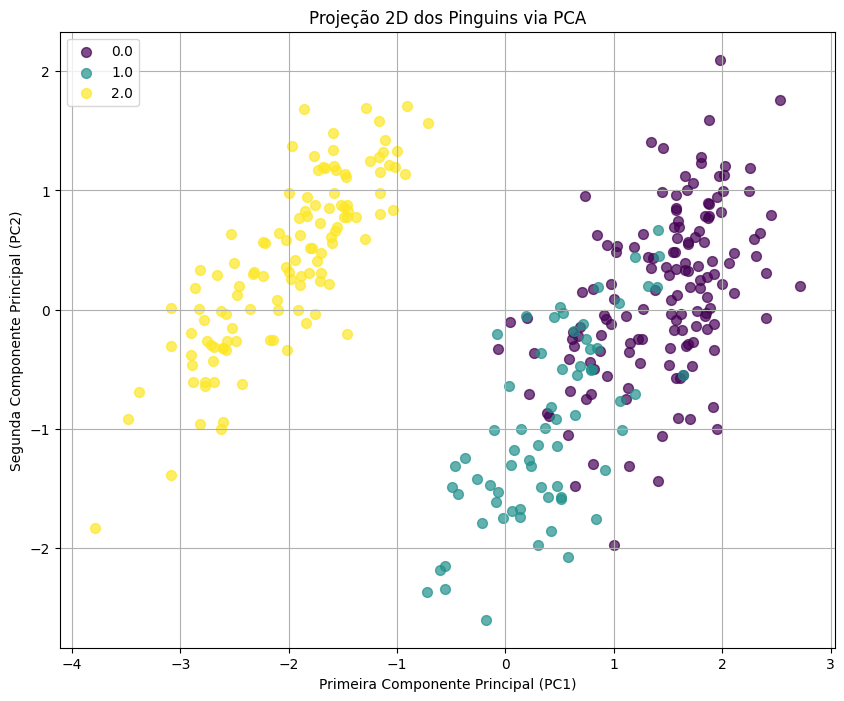


Questão 2b: Variância Explicada
Variância explicada por cada componente principal:
  PC1: 0.6863 (68.63%)
  PC2: 0.1945 (19.45%)
  PC3: 0.0922 (9.22%)
  PC4: 0.0270 (2.70%)

Variância explicada acumulada para diferentes dimensões projetadas (1, 2, 3 ou 4):
  Dimensão 1: 0.6863 (68.63%)
  Dimensão 2: 0.8809 (88.09%)
  Dimensão 3: 0.9730 (97.30%)
  Dimensão 4: 1.0000 (100.00%)


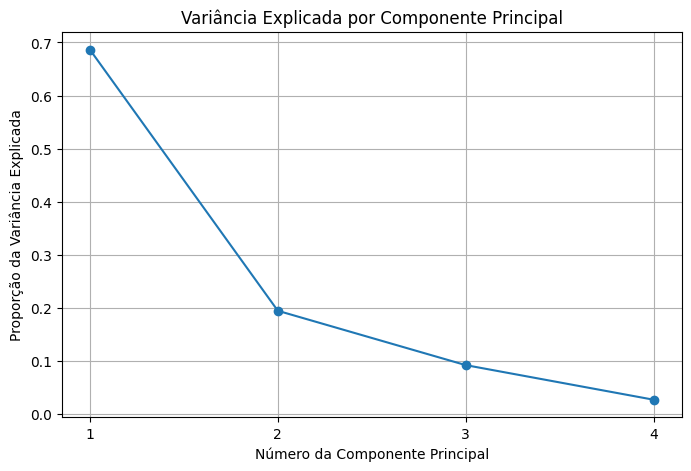

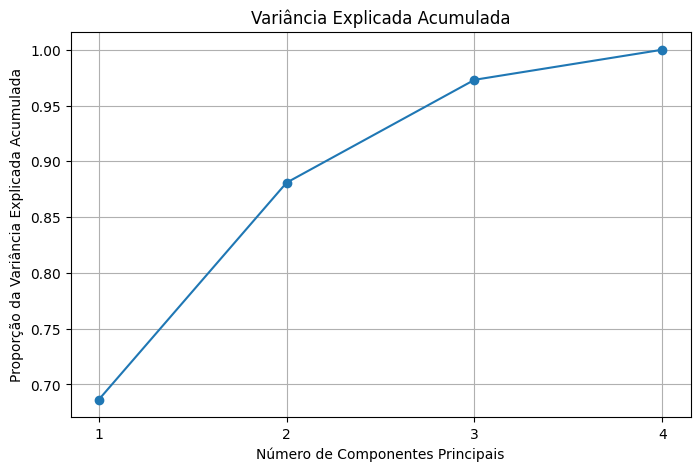

In [ ]:
def load_data(filepath):
    """Carrega o dataset especificado."""
    if not os.path.exists(filepath):
        print(f"Erro: Arquivo '{filepath}' não encontrado.")
        exit()
    try:
        df = pd.read_csv(filepath)
        expected_cols = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'species']
        if all(col in df.columns for col in expected_cols):
            print(f"Arquivo '{filepath}' lido com sucesso e colunas esperadas encontradas.")
            return df
        else:
            print(f"Aviso: Algumas colunas esperadas não foram encontradas com os nomes padrão.")
            print(f"Colunas encontradas: {df.columns.tolist()}")
            print("Tentando ler o CSV sem cabeçalho e com nomes padrão.")
            col_names = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'species']
            df = pd.read_csv(filepath, header=None)
            if df.shape[1] >= 5:
                df.rename(columns={0: 'bill_length_mm', 1: 'bill_depth_mm', 2: 'flipper_length_mm', 3: 'body_mass_g', 4: 'species'}, inplace=True)
                print("CSV lido sem cabeçalho e colunas renomeadas (índices 0-4).")
                return df
            else:
                print("Erro: O arquivo CSV não contém o número esperado de colunas (4 atributos + 1 espécie).")
                exit()

    except Exception as e:
        print(f"Erro ao ler o arquivo CSV ou colunas. Detalhes: {e}")
        print("Tentando ler o CSV sem cabeçalho e assumindo índices numéricos para colunas.")
        df = pd.read_csv(filepath, header=None)
        if df.shape[1] >= 5:
            df.columns = [f'col_{i}' for i in range(df.shape[1])]
            print(f"Colunas tratadas como genéricas: {df.columns.tolist()}")
            print("Por favor, verifique se as 4 primeiras colunas são atributos e a 5a é a espécie.")
            return df
        else:
            print("Erro fatal: Não foi possível ler o arquivo CSV ou encontrar dados suficientes.")
            exit()


def normalize_data(data_array):
    mean = np.mean(data_array, axis=0)
    std = np.std(data_array, axis=0)
    std[std == 0] = 1.0
    normalized_data = (data_array - mean) / std
    return normalized_data, mean, std

class CustomPCA:
    def __init__(self, n_components=None):
        self.n_components = n_components
        self.components = None
        self.explained_variance = None
        self.explained_variance_ratio = None

    def fit(self, X):
        covariance_matrix = np.cov(X, rowvar=False)

        U, s, Vt = np.linalg.svd(covariance_matrix)

        eigenvalues = s

        sorted_indices = np.argsort(eigenvalues)[::-1]
        self.explained_variance = eigenvalues[sorted_indices]
        self.components = Vt[sorted_indices]

        total_variance = np.sum(self.explained_variance)
        self.explained_variance_ratio = self.explained_variance / total_variance

        if self.n_components is not None:
            self.components = self.components[:self.n_components]
            self.explained_variance = self.explained_variance[:self.n_components]
            self.explained_variance_ratio = self.explained_variance_ratio[:self.n_components]

    def transform(self, X):
        if self.components is None:
            raise RuntimeError("O PCA não foi ajustado ainda. Chame .fit(X) primeiro.")

        return np.dot(X, self.components.T)

if __name__ == "__main__":
    data_path = 'penguins.csv'
    df_original = load_data(data_path)

    df_cleaned = df_original.dropna()

    expected_attr_cols = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
    species_col = 'species'

    actual_attr_cols = [col for col in expected_attr_cols if col in df_cleaned.columns]
    actual_species_col = species_col if species_col in df_cleaned.columns else None

    if len(actual_attr_cols) == 4 and actual_species_col is not None:
        print("Colunas de atributos e espécie identificadas com nomes padrão.")
        X_attributes = df_cleaned[actual_attr_cols].values
        y_species = df_cleaned[actual_species_col].values
    elif len(df_cleaned.columns) >= 5:
        print("Colunas padrão não encontradas. Tentando usar indexação numérica.")
        X_attributes = df_cleaned.iloc[:, 0:4].values
        y_species = df_cleaned.iloc[:, 4].values
    else:
        print("Erro: Não foi possível identificar as colunas de atributos ou a coluna de espécie.")
        print(f"Colunas disponíveis no DataFrame limpo: {df_cleaned.columns.tolist()}")
        exit()

    X_normalized, _, _ = normalize_data(X_attributes)

    print("Questão 2a: Projeção em 2 Dimensões")

    pca_2d = CustomPCA(n_components=2)
    pca_2d.fit(X_normalized)

    X_projected_2d = pca_2d.transform(X_normalized)

    plt.figure(figsize=(10, 8))
    unique_species = np.unique(y_species)
    colors = plt.cm.get_cmap('viridis', len(unique_species))

    for i, species in enumerate(unique_species):
        plt.scatter(X_projected_2d[y_species == species, 0],
                    X_projected_2d[y_species == species, 1],
                    color=colors(i),
                    label=species,
                    alpha=0.7,
                    s=50)

    plt.title('Projeção 2D dos Pinguins via PCA')
    plt.xlabel('Primeira Componente Principal (PC1)')
    plt.ylabel('Segunda Componente Principal (PC2)')
    plt.legend()
    plt.grid(True)
    plt.show()

    print("\nQuestão 2b: Variância Explicada")

    pca_full = CustomPCA()
    pca_full.fit(X_normalized)

    print("Variância explicada por cada componente principal:")
    for i in range(len(pca_full.explained_variance_ratio)):
        print(f"  PC{i+1}: {pca_full.explained_variance_ratio[i]:.4f} ({pca_full.explained_variance_ratio[i]*100:.2f}%)")

    print("\nVariância explicada acumulada para diferentes dimensões projetadas (1, 2, 3 ou 4):")
    accumulated_variance = 0
    for dim in range(1, 5):
        if dim <= len(pca_full.explained_variance_ratio):
            accumulated_variance = np.sum(pca_full.explained_variance_ratio[:dim])
            print(f"  Dimensão {dim}: {accumulated_variance:.4f} ({accumulated_variance*100:.2f}%)")
        else:
            print(f"  Dimensão {dim}: Não há tantas componentes principais ({len(pca_full.explained_variance_ratio)} disponíveis).")

    plt.figure(figsize=(8, 5))
    plt.plot(range(1, len(pca_full.explained_variance_ratio) + 1), pca_full.explained_variance_ratio, marker='o', linestyle='-')
    plt.title('Variância Explicada por Componente Principal')
    plt.xlabel('Número da Componente Principal')
    plt.ylabel('Proporção da Variância Explicada')
    plt.xticks(range(1, len(pca_full.explained_variance_ratio) + 1))
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(8, 5))
    plt.plot(range(1, len(pca_full.explained_variance_ratio) + 1), np.cumsum(pca_full.explained_variance_ratio), marker='o', linestyle='-')
    plt.title('Variância Explicada Acumulada')
    plt.xlabel('Número de Componentes Principais')
    plt.ylabel('Proporção da Variância Explicada Acumulada')
    plt.xticks(range(1, len(pca_full.explained_variance_ratio) + 1))
    plt.grid(True)
    plt.show()